# AoC 2024 - Day 14

<https://adventofcode.com/2024/day/14>

In [1]:
from icecream import ic
import time

In [2]:
use_test = True  # Comment out for using actual puzzle input

## Part 1

In [3]:
try:
    use_test
except NameError:
    use_test = False
    ic("use_test was undefined - forcing to", use_test)
    
FILENAME = "input_day14_gmacario.txt"
map_width, map_height = 101, 103

# FILENAME = "test_day14.txt"
# map_width, map_height = 11, 7

In [4]:
# Read the puzzle input into a data structure, one per line
puzzle_input = list()
with open(FILENAME, 'r') as f:
    for l in f.readlines():
        # ic(l)
        _, p_pos, v_pos = l.rstrip().split("=")
        # ic(p_pos, v_pos)
        p_x, p_y = p_pos[:p_pos.index(" ")].split(",")
        v_x, v_y = v_pos.split(",")
        entry = {
            "p": (int(p_x), int(p_y)),
            "v": (int(v_x), int(v_y))
        }
        # ic(entry)
        puzzle_input.append(entry)

l = len(puzzle_input)
_ = ic(l, puzzle_input) if l < 50 else ic(l)

tm_begin = time.time()
ic(time.ctime(tm_begin))

ic| l: 500
ic| time.ctime(tm_begin): 'Sat Dec 14 10:50:33 2024'


'Sat Dec 14 10:50:33 2024'

In [5]:
def show_map_with_robots(robots:list) -> list:
    result = list()
    for y in range(map_height):
        line = ""
        for x in range(map_width):
            # which_at_xy = (r['p'] == (x,y) for r in robots)
            count_at_xy = sum(r['p'] == (x,y) for r in robots)
            # ic(which_at_xy)
            line += f"{count_at_xy:03}{"-" if x+1 < map_width else ""}"
        result.append(line)
    return result

# _ = ic(show_map_with_robots(puzzle_input))

In [6]:
def move_robots_one_time(robots:list) -> list:
    for r in robots:
        new_x = (r['p'][0] + r['v'][0]) % map_width
        new_y = (r['p'][1] + r['v'][1]) % map_height
        r['p'] = (new_x, new_y)
    return robots

# one_robot_only = [
#     {"p": (2, 4), "v": (2, -3)}
# ]
# _ = ic("0 sec", show_map_with_robots(one_robot_only))
# move_robots_one_time(one_robot_only)
# # _ = ic("1 sec", show_map_with_robots(one_robot_only))
# move_robots_one_time(one_robot_only)
# # _ = ic("2 sec", show_map_with_robots(one_robot_only))
# move_robots_one_time(one_robot_only)
# # _ = ic("3 sec", show_map_with_robots(one_robot_only))
# move_robots_one_time(one_robot_only)
# # _ = ic("4 sec", show_map_with_robots(one_robot_only))
# move_robots_one_time(one_robot_only)
# _ = ic("5 sec", show_map_with_robots(one_robot_only))
# # move_robots_one_time(one_robot_only)
# # _ = ic("6 sec", show_map_with_robots(one_robot_only))

In [7]:
def quadrant(x, y) -> int:
    """
    Return in which quadrant number the coordinate (x,y) is located
    """
    assert(map_width % 2 == 1)
    assert(map_height % 2 == 1)
    q_width = map_width // 2
    q_height = map_height // 2
    if 0 <= x < q_width and 0 <= y < q_height:
        return 1     
    elif q_width < x < map_width and 0 <= y < q_height:
        return 2
    elif 0 <= x < q_width and q_height < y < map_height:
        return 3
    elif q_width < x < map_width and q_height < y < map_height:
        return 4
    else:
        return 0

In [8]:
def safety_factor(robots: list) -> int:
    """
    Calculate the number of robots in each quadrant
    """
    positions = [0, 0, 0, 0, 0]
    for r in robots:
        pos = r['p']
        q = quadrant(pos[0], pos[1])
        assert q in range(5)
        positions[q] += 1
    ic(positions)
    return positions[1] * positions[2] * positions[3] * positions[4]

# _ = ic(safety_factor(puzzle_input))

In [9]:
# _ = ic("0 sec", show_map_with_robots(puzzle_input))
# for n in range(100):
#     move_robots_one_time(puzzle_input)
# _ = ic("100 sec", show_map_with_robots(puzzle_input))

In [10]:
import copy

def solve_part1():
    part1_state = copy.deepcopy(puzzle_input)
    for n in range(100):
        move_robots_one_time(part1_state)
    return safety_factor(part1_state)

# tm_begin = time.time()
part1_result = solve_part1()
tm_end = time.time()
ic("elapsed=", tm_end - tm_begin, "result=", part1_result)
print("Day 14 Part 1 RESULT:")
print(part1_result)

ic| positions: [9, 135, 121, 117, 118]
ic| "elapsed=": 'elapsed='
    tm_end - tm_begin: 0.14857101440429688
    "result=": 'result='
    part1_result: 225521010


Day 14 Part 1 RESULT:
225521010


## Part 2

During the bathroom break, someone notices that these robots seem awfully similar to ones built and used at the North Pole. If they're the same type of robots, they should have a hard-coded Easter egg: very rarely, most of the robots should arrange themselves into a picture of a Christmas tree.

What is the fewest number of seconds that must elapse for the robots to display the Easter egg?

In [11]:
from IPython.display import display,HTML
from PIL import Image

# im = Image.open("test_image1.png")
# ic(im.format, im.size, im.mode)
# ic(im)
# im.show()

In [12]:

def show_robots_as_png(robots:list) -> Image:

    num_robots = len(robots)
    list_of_pixels = []
    k = 0
    for y in range(map_height):
        for x in range(map_width):
            count_at_xy = sum(r['p'] == (x,y) for r in robots)
            # ic(which_at_xy)
            list_of_pixels.append(int(count_at_xy * 64) % 256)
            k += 1

    # ic(len(list_of_pixels), list_of_pixels)
    pixels = bytes(list_of_pixels)
    # ic(len(pixels), pixels)

    # 8-bit pixels, grayscale
    im = Image.frombytes(
        mode = "L",
        size = (map_width, map_height),
        data = pixels
    )
    im2 = im.resize((map_width * 2, map_height * 2))
    # im2 = im.resize((map_width * 4, map_height * 4))
    # im2 = im.resize((map_width * 20, map_height * 20))
    ...
    return im

In [13]:
import os

ic| 'Image', n_iterations: 7700, entropy: 0.28072540078531005
ic| n_iterations: 7700


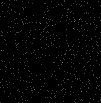

ic| 'Image', n_iterations: 7707, entropy: 0.2799133006251351
ic| n_iterations: 7707


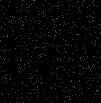

ic| 'Image', n_iterations: 7713, entropy: 0.27967895421985994
ic| n_iterations: 7713


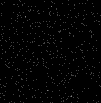

ic| 'Image', n_iterations: 7774, entropy: 0.27811128522623413
ic| n_iterations: 7774


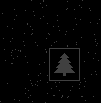

ic| "I believe we found the solution, haven't we?"
ic| least_entropic[0]: 7774


7774

In [14]:
part2_state = copy.deepcopy(puzzle_input)
n_iterations = 0
least_entropic = [0, 1.0]

# OUTDIR = "out"
# if not os.path.isdir(OUTDIR):
#     os.mkdir(OUTDIR)    
for i in range(map_width * map_height):
    move_robots_one_time(puzzle_input)
    n_iterations += 1
    # if n_iterations % 10 == 0:
    #     ic(n_iterations)
    if n_iterations < 7700:
        continue

    im = show_robots_as_png(puzzle_input)
    entropy = im.entropy()
    if entropy < least_entropic[1]:
        ic("Image", n_iterations, entropy)
        least_entropic[0] = n_iterations
        least_entropic[1] = entropy
        ic(n_iterations)
        display(im)
    # outfile = f"{OUTDIR}/frame{n_iterations:04}.png"
    # if not os.path.isfile(outfile):
    #     im.save(outfile, "PNG")
    if entropy < 0.2782:
        ic("I believe we found the solution, haven't we?")
        break

ic(least_entropic[0])

If you have saved the PNG files, after all the PNG files have been created, open a terminal and sort them by file size

```bash
find solutions/gmacario/day14/out/ -ls | sort -k 7 | head -10
```

Result:

```text
aoc-2024-py3.12gmacario@hw2482:~/github/B-AROL-O/aoc-2024$ find solutions/gmacario/day14/out/ -ls | sort -k 7 | head -10
  7592746      4 -rw-rw-r--   1 gmacario gmacario      528 Dec 14 09:42 solutions/gmacario/day14/out/frame7674.png
  7579322      4 -rw-rw-r--   1 gmacario gmacario      651 Dec 14 08:51 solutions/gmacario/day14/out/frame0258.png
  7588523      4 -rw-rw-r--   1 gmacario gmacario      662 Dec 14 09:13 solutions/gmacario/day14/out/frame3451.png
  7593261      4 -rw-rw-r--   1 gmacario gmacario      662 Dec 14 09:46 solutions/gmacario/day14/out/frame8189.png
  7580043      4 -rw-rw-r--   1 gmacario gmacario      663 Dec 14 08:56 solutions/gmacario/day14/out/frame0979.png
  7591304      4 -rw-rw-r--   1 gmacario gmacario      663 Dec 14 09:32 solutions/gmacario/day14/out/frame6232.png
  7591407      4 -rw-rw-r--   1 gmacario gmacario      663 Dec 14 09:33 solutions/gmacario/day14/out/frame6335.png
  7589759      4 -rw-rw-r--   1 gmacario gmacario      666 Dec 14 09:22 solutions/gmacario/day14/out/frame4687.png
  7579940      4 -rw-rw-r--   1 gmacario gmacario      667 Dec 14 08:55 solutions/gmacario/day14/out/frame0876.png
  7589244      4 -rw-rw-r--   1 gmacario gmacario      667 Dec 14 09:18 solutions/gmacario/day14/out/frame4172.png
aoc-2024-py3.12gmacario@hw2482:~/github/B-AROL-O/aoc-2024$
```

The smallest file corresponds to the image with least entropy 

In [15]:
def solve_part2():
    return least_entropic[0]

# tm_begin = time.time()
part2_result = solve_part2()
tm_end = time.time()
ic("elapsed=", tm_end - tm_begin, "result=", part2_result)
print("Day 14 Part 2 RESULT:")
print(part2_result)

ic| "elapsed=": 'elapsed='
    tm_end - tm_begin: 29.907503366470337
    "result=": 'result='
    part2_result: 7774


Day 14 Part 2 RESULT:
7774
